In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm as CM
from PIL import Image
import torch
from utils import single_evaluate
from models import CGDRCN1, MyFC
from utils import compute_errors
import os
import numpy as np
import pandas as pd
from config import norm, folder_path, gt_data_test_path, gt_data_val_path, gt_data_train_path, image_data_test_path, image_data_train_path, image_data_val_path, density_data_test_path, density_data_train_path, density_data_val_path

In [3]:
#device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [4]:
"""folder_path = './processed_data'

gt_data_train_path = './processed_data/train/gt'
image_data_train_path = './processed_data/train/img'
density_data_train_path = './processed_data/train/den'

gt_data_val_path = './processed_data/val/gt'
image_data_val_path = './processed_data/val/img'
density_data_val_path = './processed_data/val/den'

gt_data_test_path = './processed_data/test/gt'
image_data_test_path = './processed_data/test/img'
density_data_test_path = './processed_data/test/den'

norm = 100"""

"folder_path = './processed_data'\n\ngt_data_train_path = './processed_data/train/gt'\nimage_data_train_path = './processed_data/train/img'\ndensity_data_train_path = './processed_data/train/den'\n\ngt_data_val_path = './processed_data/val/gt'\nimage_data_val_path = './processed_data/val/img'\ndensity_data_val_path = './processed_data/val/den'\n\ngt_data_test_path = './processed_data/test/gt'\nimage_data_test_path = './processed_data/test/img'\ndensity_data_test_path = './processed_data/test/den'\n\nnorm = 100"

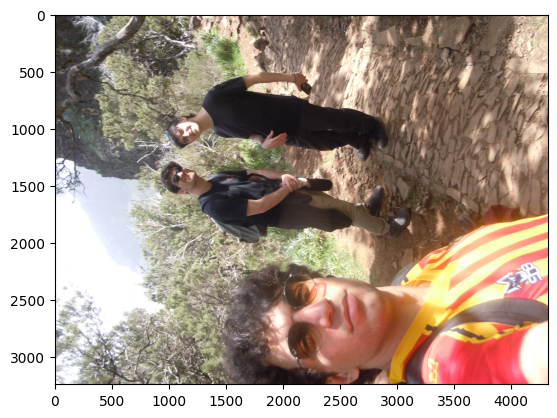

In [5]:
model = torch.load('./models/model1-50epochs-lr5.pt',map_location = device)
model.to(device)
model.eval()
testpath0 = './test_photos/0016.jpg'
testpath1 = './test_photos/Offerte-famiglia-5-persone-Hotel-Paris.jpg'
testpath2 = './test_photos/persone-strada-covid.jpg'
testpath3 = './test_photos/famiglia.jpg'
testpath4 = './test_photos/DSCN4513.JPG'
testpath=testpath4
plt.imshow(Image.open(testpath))

5.0


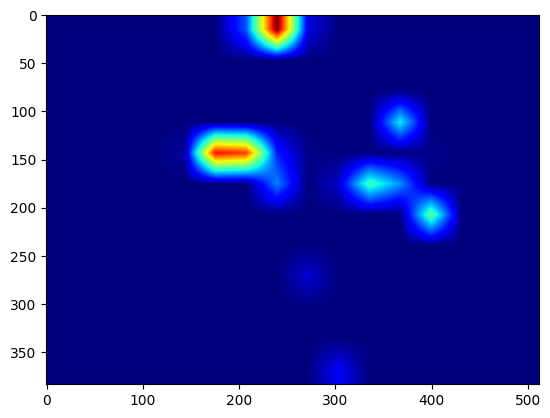

In [6]:
out = single_evaluate(model, testpath, norm)
#print(out)
plt.imshow(out["prediction"], cmap=CM.jet)
print(out['count'])

In [7]:
#model = torch.load('/content/drive/MyDrive/Models and Results/model1-50epochs-lr5.pt',map_location = device)
#model.to(device)
#model.eval()
#calculate_mae(model, device, image_data_val_path,'appoggio.csv', 'val')
#csv_path = '/content/drive/MyDrive/Models and Results/model2val'
#csv_path = '/content/drive/MyDrive/results.csv'
#errors = compute_errors(folder_path, csv_path, 'val')

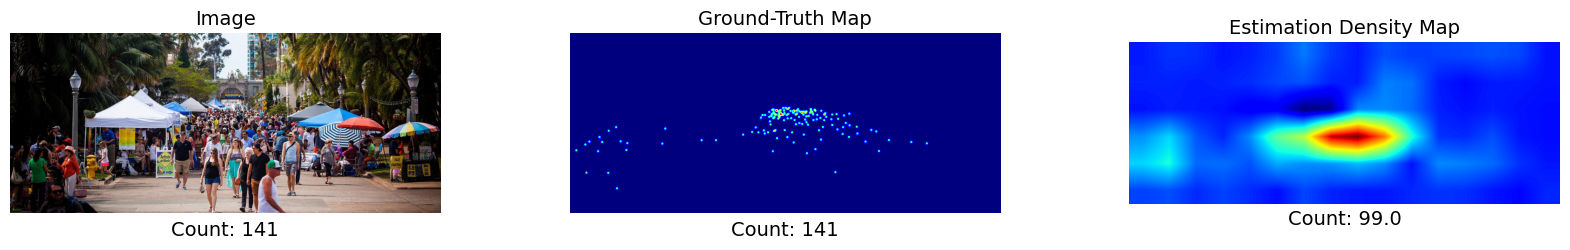

In [8]:
model = torch.load('models\model2-lr6-unfreezed.pt',map_location = device)          #models\model2-lr6-unfreezed.pt
#model.load_state_dict(torch.load(PATH)) 
model.to(device)
model.eval()
list_images = os.listdir(image_data_val_path)
index = np.random.randint(0, len(list_images) - 1)
out = single_evaluate(model, image_data_val_path + '/' + list_images[index], norm)
image = Image.open(image_data_val_path + '/' + list_images[index])
map_path = (image_data_val_path + '/' + list_images[index]).replace("img", "den").replace(".jpg", ".csv")
density_map_csv = pd.read_csv(map_path, header=None)
gt = density_map_csv.values
gt_heads =int(np.sum(gt))
prediction = out["prediction"]
imgs = [image, gt, prediction]
values = [gt_heads, gt_heads ,out["count"]]
titles = ['Image', 'Ground-Truth Map', 'Estimation Density Map']
fig, axs = plt.subplots(1, 3, figsize=(20, 8))
fig.subplots_adjust(wspace=0.3)
for i, path in enumerate(imgs):
    if (i==0):
      axs[i].imshow(imgs[i])
      axs[i].axis('off')
    else:
      axs[i].imshow(imgs[i], cmap=CM.jet)
      axs[i].axis('off')
    # Add the text below the image
    axs[i].set_title(titles[i], fontsize=14)
    axs[i].text(0.5, -0.1, f'Count: {values[i]}', ha='center', va='center', transform=axs[i].transAxes, fontsize=14)

plt.show()

In [9]:
#model = torch.load('/content/drive/MyDrive/model1-20epochs.pt',map_location = device)
#model.to(device)
#model.eval()
#calculate_mae(model, device, image_data_test_path,'appoggio', 'test')
#csv_path = '/content/drive/MyDrive/Models and Results/model2test.csv'
#csv_path = '/content/drive/MyDrive/results.csv'
#errors = compute_errors(folder_path, csv_path, 'test')

In [10]:
"""results_dict = {
    "MyFC": {"Low MAE Val": 24.8, "Medium MAE Val": 61.2, "High MAE Val": 346.1, "Overall MAE Val": 85.2, "Overall MSE Val": 254.0, "Overall MAE Test": 105.7, "Overall MSE Test": 357.9},
    "MyCGDRCN": {"Low MAE Val": 37.1, "Medium MAE Val": 70.8, "High MAE Val": 372.5, "Overall MAE Val": 97.8, "Overall MSE Val": 274.7, "Overall MAE Test": 116.7, "Overall MSE Test": 381.8},
    "CG-DRCN-CC-VGG16 (Base)": {"Overall MAE Val": 81.1, "Overall MSE Val": 300.5}

}
results_df = pd.DataFrame.from_dict(results_dict, orient="index")

print(results_df.to_string())"""

'results_dict = {\n    "MyFC": {"Low MAE Val": 24.8, "Medium MAE Val": 61.2, "High MAE Val": 346.1, "Overall MAE Val": 85.2, "Overall MSE Val": 254.0, "Overall MAE Test": 105.7, "Overall MSE Test": 357.9},\n    "MyCGDRCN": {"Low MAE Val": 37.1, "Medium MAE Val": 70.8, "High MAE Val": 372.5, "Overall MAE Val": 97.8, "Overall MSE Val": 274.7, "Overall MAE Test": 116.7, "Overall MSE Test": 381.8},\n    "CG-DRCN-CC-VGG16 (Base)": {"Overall MAE Val": 81.1, "Overall MSE Val": 300.5}\n\n}\nresults_df = pd.DataFrame.from_dict(results_dict, orient="index")\n\nprint(results_df.to_string())'